# Capstone 3 - Customer Churn Prediction for Telco

In our previous [Notebook](https://github.com/dvanheeswijk/Springboard/blob/master/Capstone_3/Capstone%203%20-%20EDA.ipynb), we explored our data set to find any possible leads to areas to focus on for our modeling. We found that bigger cities had larger churn volumes, while a few cities also had much higher percentages of churn than most others, specifically smaller cities with a handful of customers. We also saw that Fiber Optics customers were almost twice as likely to churn as DSL customers or customers with no internet service. Lastly, we saw that the primary reasons for leaving were basically either competitive offers from other companies or poor service attitude when dealing with troubleshooting issues. 

We will now explore *clean_data.csv*, our preprocessed data set and create training and testing data sets in order to evaluate models.

We start with importing the data and necessary libraries.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv('data/clean_data.csv')

data.head()

,CustomerID,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,3668-QPYBK,90003,33.964131,-118.272783,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
1,9237-HQITU,90005,34.059281,-118.307420,1,0,0,1,2,1,...,0,0,0,1,0,0,0,0,0,0
2,9305-CDSKC,90006,34.048013,-118.293953,1,0,0,1,8,1,...,0,0,0,1,0,0,0,0,0,0
3,7892-POOKP,90010,34.062125,-118.315709,1,0,1,1,28,1,...,0,0,0,1,0,0,0,0,0,0
4,0280-XJGEX,90015,34.039224,-118.266293,0,0,0,1,49,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6583 entries, CustomerID to Churn Reason_Service dissatisfaction
dtypes: float64(3), int64(6579), object(1)
memory usage: 353.7+ MB


In [11]:
data['CustomerID'].is_unique

True

In [12]:
data.set_index('CustomerID', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Columns: 6582 entries, Zip Code to Churn Reason_Service dissatisfaction
dtypes: float64(3), int64(6579)
memory usage: 353.7+ MB


We see now that we have the data in complete numeric format, meaning that we are ready to begin training the data.

### Training the data

In [22]:
# Splitting the data between our dependent and independent variables
X = data.drop(columns='Churn Value')
y = data['Churn Value']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=42)

In [23]:
print(X_train.shape, X_test.shape)

(5634, 6581) (1409, 6581)


In [24]:
print(y_train.shape, y_test.shape)

(5634,) (1409,)


### Creating the models

#### K Means Classifier

In [27]:
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()

clf = RandomizedSearchCV(knn, param_grid, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

{'n_neighbors': 30}

In [30]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

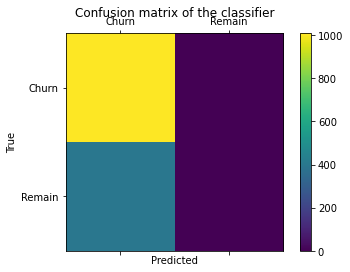

In [34]:
# plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
# plt.title('Normalized Matrix')
labels = ['Churn', 'Remain']


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(pl)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
print(pl)

[[1009    0]
 [ 400    0]]


In [36]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred))

0.5


As we can see, this model is very bad. It not only doesn't do better than flipping a coin, it also only predicts true values, which gives us no prediction value at all. We can fix this somewhat by changing a few of the paramaters that we didn't select to get something better, but it is perhaps more fruitful to move to another type of model.